# Introduction

In this notebook, we are going to analyze a dataset. It contains density data for 109 fish species, environmental conditions, and measurements of coral cover and diversity. 

The aim of this notebook is to understand how our data is structured.


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


## Importing dataset

In [53]:
# Importing complete dataset
# Read the file content as a DataFrame
df = pd.read_csv("C:/Users/Afra Muhammad/OneDrive/1 - Laptop Asus\Documents//species.csv",sep=",",index_col=0)

In [54]:
df.head(10)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,...,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,...,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,...,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,...,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,...,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156
5,5067281_105U,biomass,2005,July,24.466283,-81.786533,26.504821,FLA KEYS,17.620519,1.200000,...,0.408742,7886,0.382,2005,SPGR_LR,FLA KEYS,17.620519,1.200000,4,0.826781
6,5157285_104U,impact,2005,July,24.474067,-81.739067,8.696966,FLA KEYS,25.018963,1.149431,...,0.389774,3052,NaN,2005,SPGR_LR,FLA KEYS,25.018963,1.149431,4,0.934887
7,5168534_472U,biomass,2005,June,24.471833,-81.733867,20.300000,FLA KEYS,6.000000,1.300000,...,0.391648,8192,NaN,2005,SPGR_LR,FLA KEYS,6.000000,1.300000,2,0.853695
8,5187287_495U,biomass,2005,June,24.477337,-81.722680,20.463554,FLA KEYS,9.817768,1.700000,...,0.380080,8662,0.382,2005,SPGR_LR,FLA KEYS,9.817768,1.700000,4,0.837965
9,5194788_112U,biomass,2005,July,24.479050,-81.718833,9.500000,FLA KEYS,2.493606,0.849361,...,0.375463,1990,NaN,2005,SPGR_HR,FLA KEYS,2.493606,0.849361,4,0.890591


In [55]:
df.tail(10)


,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
3989,361106_3022U,impact,2018,September,26.942742,-80.011750,23.348518,SEFCRI,0.247529,0.248765,...,1.356936,181,0.341,2018,DPRC,SEFCRI,0.247529,0.248765,2,0.905753
3990,1885517_3265U,biomass,2018,September,25.893955,-80.087125,24.201753,SEFCRI,3.502191,1.449343,...,14.528516,2698,0.583,2018,SPGR,SEFCRI,3.502191,1.449343,2,0.371389
3991,2000265_1230U,impact,2018,September,25.563808,-80.099100,10.490331,FLA KEYS,2.263359,1.504453,...,0.318765,3486,0.724,2018,CONT_MR,FLA KEYS,2.263359,1.504453,2,0.867506
3992,2037709_3232U,impact,2018,September,25.789150,-80.088196,14.844125,SEFCRI,1.000000,0.908094,...,12.523497,2440,0.707,2018,LIRO,SEFCRI,1.000000,0.908094,2,0.812486
3993,2063293_3272U,impact,2018,September,25.771713,-80.087913,17.040414,SEFCRI,1.252820,0.925846,...,12.052737,7908,0.709,2018,LIRO,SEFCRI,1.252820,0.925846,2,0.812745
3994,2065262_3278U,impact,2018,September,25.770183,-80.087650,17.953469,SEFCRI,1.000000,0.834130,...,12.064380,6958,0.709,2018,APRD,SEFCRI,1.000000,0.834130,2,0.829341
3995,1223281_1188U,impact,2018,September,24.580356,-81.303040,7.148084,FLA KEYS,1.246807,0.498723,...,0.042837,7602,NaN,2018,CONT_LR,FLA KEYS,1.246807,0.498723,2,0.831818
3996,2003949_1803U,biomass,2018,September,25.590833,-80.096706,2.455478,FLA KEYS,1.795652,0.535043,...,0.402824,5480,0.705,2018,RUBB_LR,FLA KEYS,1.795652,0.535043,2,0.824709
3997,1966838_3070U,impact,2018,September,25.838121,-80.099420,8.145070,SEFCRI,1.000000,0.601972,...,14.823301,3575,0.740,2018,LIRI,SEFCRI,1.000000,0.601972,2,0.857023
3998,1990470_3097U,impact,2018,September,25.821798,-80.091136,14.344588,SEFCRI,1.000000,0.551203,...,13.893536,3506,0.740,2018,LIRM,SEFCRI,1.000000,0.551203,2,0.745798


## Understanding the columns

We have several columns in our dataset :
1) site: numeric site descriptor matching NOAA Reef Visual Census sites
2) model: factor used to subset data for two separate models
3) Year: year of RVC fish survey
4) Month: month of RVC fish survey
5) Latitude: latitude of RVC fish survey
6) Longitude: longitude of RVC fish survey
7) Depth: depth of RVC fish survey averaged for each surveyor
8) Region: jurisdiction of RVC fish survey
9) Coral_cover: percentage of benthos made up of living hard coral visually estimated by 
RVC surveyors
10) Reef_complexity: maximum hard relief measured by averaging the height of the highest 
rigid point above the lowest point in 8 segments of the cylinder for RVC surveys
11) SST: minimum monthly average sea surface temperature in Celsius derived from CoRTAD 
database from 2012-2016
12) NPP: net primary productivity derived from remotely sensed chlorophyll-a from the OSU 
VGPM model
13) Wave_exposure: exposure calculated using linear wave theory
14) Habitat_type_classLV0: habitat classification of each site according to the FWC Unified 
Reef Map level 0
15) Habitat_type_classLV2: habitat classification of each site according to the FWC Unified 
Reef Map level 2
16) Coral_area_UFRTM_20km: area classified as reef by Unified Reef Map level 0 within 
20 km of each site
17) Coral_area_UFRTM_200km: area classified as reef by Unified Reef Map level 0 within 
200 km of each site
18) Depth_Sbrocco: remotely sensed depth of survey sites
19) Deepwater: euclidean distance in meters over water to the 30-meter bathymetric line
20) FSA: euclidean distance in meters over water to the nearest fish spawning aggregation site
21) Marina_slips_10km: number of marina slips over 45 ft within 10 km of each site
22) Marina_slips_25km: number of marina slips over 45 ft within 25 km of each site
23) Marine_reserve: protected status of site; whether fishing was allowed or not
24) Population_20km: human population living within 20 km of reef sites derived from 
LandScan dataset
25) Population_50km: human population living within 50 km of reef sites derived from 
LandScan dataset
26) Recreational_fishermen_50km: number of recreational fishing licenses within 50 km of 
reef sites derived by zip code
27)Tourist_fishing: statistics from Johns et al. 2001 and publicly available dataset of hotel 
units in Florida
28) Artificial_reefs_1km: number of artificial reefs within 1 km
29) SG_permits_50km: number of commercial snapper-grouper fishing permits within 50 km
30) SG_charter_permits_25km: SG_permits_50km: number of recreational snapper-grouper 
fishing permits within 25 km
31)Total_gravity_intercept: number of people in population centers within 500 km divided 
by the square of travel time
32)Total_gravity: number of people in population centers within 500 km divided by the 
square of travel time
33) Keys_Divisions: sub-jurisdictions of Florida Keys including Upper, Middle, Lower Keys 
and Marquesas; NAs for non Florida Keys sites
34) FKNMS: Florida Keys National Marine Sanctuary sites; NAs for non Florida Keys sites
35) DryTortugas: Dry Tortugas sites; NAs for non-Dry Tortugas sites
36)BNP: Biscayne National Park sites; NAs for non-BNP sites
37) CoralECA: Coral Ecological Conservation Area sites; NAs for non-ECA sites (also known 
as SEFCRI)
38) Nursery_seagrass: connectivity of reef sites to continuous seagrass patches within 10 km
39) Nursery_mangroves: connectivity of reef sites to mangrove stands within 12 km
40) connectivity: number of larva from upstream modeled to a connectivity matrix
41) Comm_engagement: metrics of commercial engagement based on landings and permits 
provided by NOAA
42) Comm_reliance: metrics of commercial engagement based on landings and permits 
relative to size of fishing community provided by NOAA
43) Rec_engagement: metrics of recreational engagement based on landings and permits 
provided by NOAA
44) Rec_reliance: metrics of recreational engagement based on landings and permits relative 
to size of fishing community provided by NOAA
45) Commercial_pounds_landed: annual number of pounds of fish reported by commercial 
anglers
46) Pop_per_area_reef_20km: human population divided by area of reef within 20km
47) Random: random number assigned to each column
48) impact: impact: fishing impact variable
49) YEAR: year of RVC surveys
50) HABITAT_CD: habitat code used by NOAA RVC surveys to stratify sites
51) REGION: jurisdiction of RVC survey sites
52) PCT_CORAL: percent coral cover
53) MAX_HARD_RELIEF: maximum hard relief
54) no.divers: number of divers for RVC survey
55) Diversity_index: score that varies between 0 and 1. A high score indicates high diversity, 
and a low score indicates low diversity. When the diversity index is zero, the community 
contains only one species (i.e., no diversity). As the number of different species increases 
and the population distribution of species becomes more even, the diversity index increases 
and approaches one.

In [56]:
# summary of dataset
df.describe()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
count,3999.000000,3999.000000,3999.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3910.000000,3.998000e+03,3999.000000,3999.000000,2779.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000
mean,2012.886222,25.361813,-80.912910,12.031226,4.549820,1.100154,23.760696,523.320811,7.322459,76727.255314,...,0.424433,6.312866e+05,6.386781,5047.471618,0.400637,2012.886222,4.549820,1.100154,3.115779,0.831469
std,3.629448,0.806724,1.051129,6.942690,5.522744,0.851008,0.552442,163.404174,0.211270,44693.794158,...,2.247541,4.861803e+05,11.092795,2919.598275,0.281552,3.629448,5.522744,0.851008,0.998422,0.114777
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,...,-0.185000,1.706314e+05,0.000000,1.000000,0.000000,2005.000000,0.000000,0.075887,2.000000,0.000000
25%,2011.000000,24.632586,-81.695419,6.351316,1.500000,0.500000,23.608484,365.925385,7.294437,50594.000000,...,-0.185000,2.469954e+05,0.039136,2550.500000,0.174000,2011.000000,1.500000,0.500000,2.000000,0.811582
50%,2013.000000,25.123213,-80.292226,10.171806,2.758143,0.900596,23.929285,533.677063,7.368210,60682.000000,...,-0.185000,3.180504e+05,0.248873,5097.000000,0.382000,2013.000000,2.758143,0.900596,4.000000,0.867035
75%,2016.000000,26.034196,-80.092946,17.148568,5.283544,1.448243,24.200861,632.628479,7.455595,91516.000000,...,0.044000,8.556702e+05,12.681632,7602.000000,0.694000,2016.000000,5.283544,1.448243,4.000000,0.900148
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,...,12.140000,1.511066e+06,55.371104,9997.000000,1.000000,2018.000000,55.000000,10.538338,8.000000,0.956324


## General Information and Data Types

1. The dataset contains 3999 entries and 56 columns.
2. Data types include integers, floats, and objects (strings).
3. Several columns have missing values, notably Coral_cover, Reef_complexity, and impact.

### Correlation Analysis with Diversity Index

In [57]:
# Create a copy of the dataframe
df_numerical = df.copy()

# Select only numerical columns
df_numerical = df_numerical.select_dtypes(include=['number'])

# Display the new dataframe to confirm
print(df_numerical.head())

   Year   Latitude  Longitude      Depth  Coral_cover  Reef_complexity  \
0  2005  24.446433 -81.962900   9.800000     2.000000         0.550322   
1  2005  24.461130 -81.840099   8.821212     6.181818         1.886364   
2  2005  24.467250 -81.832367  17.399239     7.506345         0.749873   
3  2005  24.468767 -81.822167   9.200000    10.000000         0.400000   
4  2005  24.470206 -81.808148   8.558032     2.870486         0.289415   

         SST         NPP  Wave_exposure  Coral_area_UFRTM_20km  ...  \
0  23.595392  550.865051       6.992729                  88333  ...   
1  23.578271  577.431946       6.950751                  91742  ...   
2  23.551355  595.320252       6.950181                  94607  ...   
3  23.556451  590.443543       6.959807                  96139  ...   
4  23.567590  579.874023       6.914992                  98167  ...   

   Rec_reliance  Commercial_pounds_landed  Pop_per_area_reef_20km  Random  \
0        -0.185                 1511066.2          

We are going to calculate the linear correlation between two variables. However, we are going to limit ourselves to only numerical variables

In [58]:
df_numerical.corr()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Year,1.000000,0.345661,0.166888,0.137541,-0.310759,-0.012970,0.098191,-0.253368,0.147583,-0.035816,...,-0.069668,-0.184720,0.271735,-0.021947,0.197741,1.000000,-0.310759,-0.012970,-0.203782,0.039844
Latitude,0.345661,1.000000,0.735997,0.372609,-0.274753,-0.182617,0.498172,-0.621380,0.416769,-0.094225,...,-0.231119,-0.764837,0.599799,0.002316,0.592669,0.345661,-0.274753,-0.182617,-0.438380,-0.049113
Longitude,0.166888,0.735997,1.000000,0.099303,-0.268546,-0.244490,0.892728,-0.574755,0.270254,-0.008297,...,-0.040674,-0.974294,0.453120,-0.005042,0.829754,0.166888,-0.268546,-0.244490,-0.348065,0.087126
Depth,0.137541,0.372609,0.099303,1.000000,-0.047938,0.151630,0.070826,-0.353281,0.262440,0.021246,...,-0.140069,-0.111985,0.218833,-0.013846,0.071037,0.137541,-0.047938,0.151630,-0.134548,-0.207735
Coral_cover,-0.310759,-0.274753,-0.268546,-0.047938,1.000000,0.381732,-0.269284,0.378863,-0.169537,0.039515,...,-0.000919,0.259071,-0.176252,0.033970,-0.283849,-0.310759,1.000000,0.381732,0.103719,-0.149261
Reef_complexity,-0.012970,-0.182617,-0.244490,0.151630,0.381732,1.000000,-0.217028,0.115232,-0.042173,-0.105300,...,-0.067115,0.232079,-0.086280,0.014890,-0.212372,-0.012970,0.381732,1.000000,0.100262,-0.152086
SST,0.098191,0.498172,0.892728,0.070826,-0.269284,-0.217028,1.000000,-0.650102,0.050409,0.029766,...,-0.021953,-0.872660,0.436002,-0.007023,0.848783,0.098191,-0.269284,-0.217028,-0.285364,0.151907
NPP,-0.253368,-0.621380,-0.574755,-0.353281,0.378863,0.115232,-0.650102,1.000000,-0.257676,0.271808,...,0.310277,0.599728,-0.599619,-0.009280,-0.663904,-0.253368,0.378863,0.115232,0.330376,-0.048109
Wave_exposure,0.147583,0.416769,0.270254,0.262440,-0.169537,-0.042173,0.050409,-0.257676,1.000000,-0.232993,...,-0.045936,-0.227125,0.084969,0.024086,-0.038462,0.147583,-0.169537,-0.042173,-0.094117,-0.067864
Coral_area_UFRTM_20km,-0.035816,-0.094225,-0.008297,0.021246,0.039515,-0.105300,0.029766,0.271808,-0.232993,1.000000,...,0.578875,0.002794,-0.340955,-0.008050,-0.040679,-0.035816,0.039515,-0.105300,0.049507,0.044208


### Creating a heatmap for the correlation matrix

<Axes: >

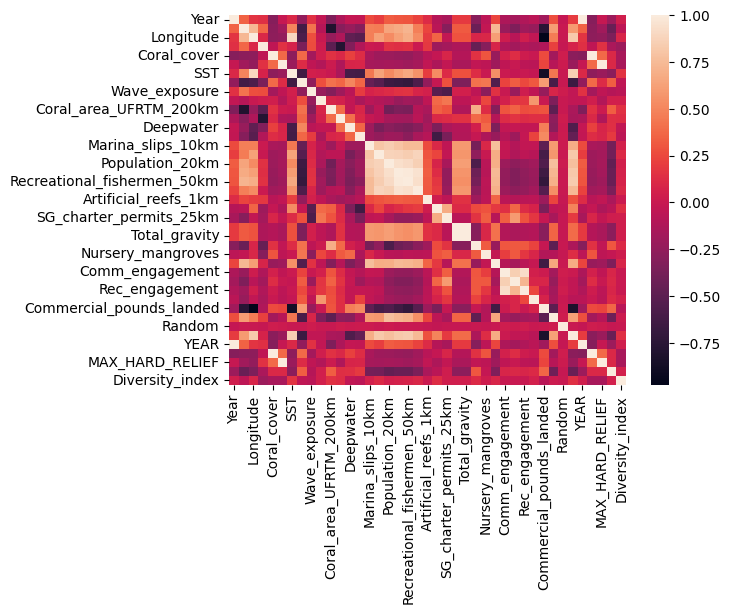

In [59]:
sns.heatmap(df_numerical.corr())

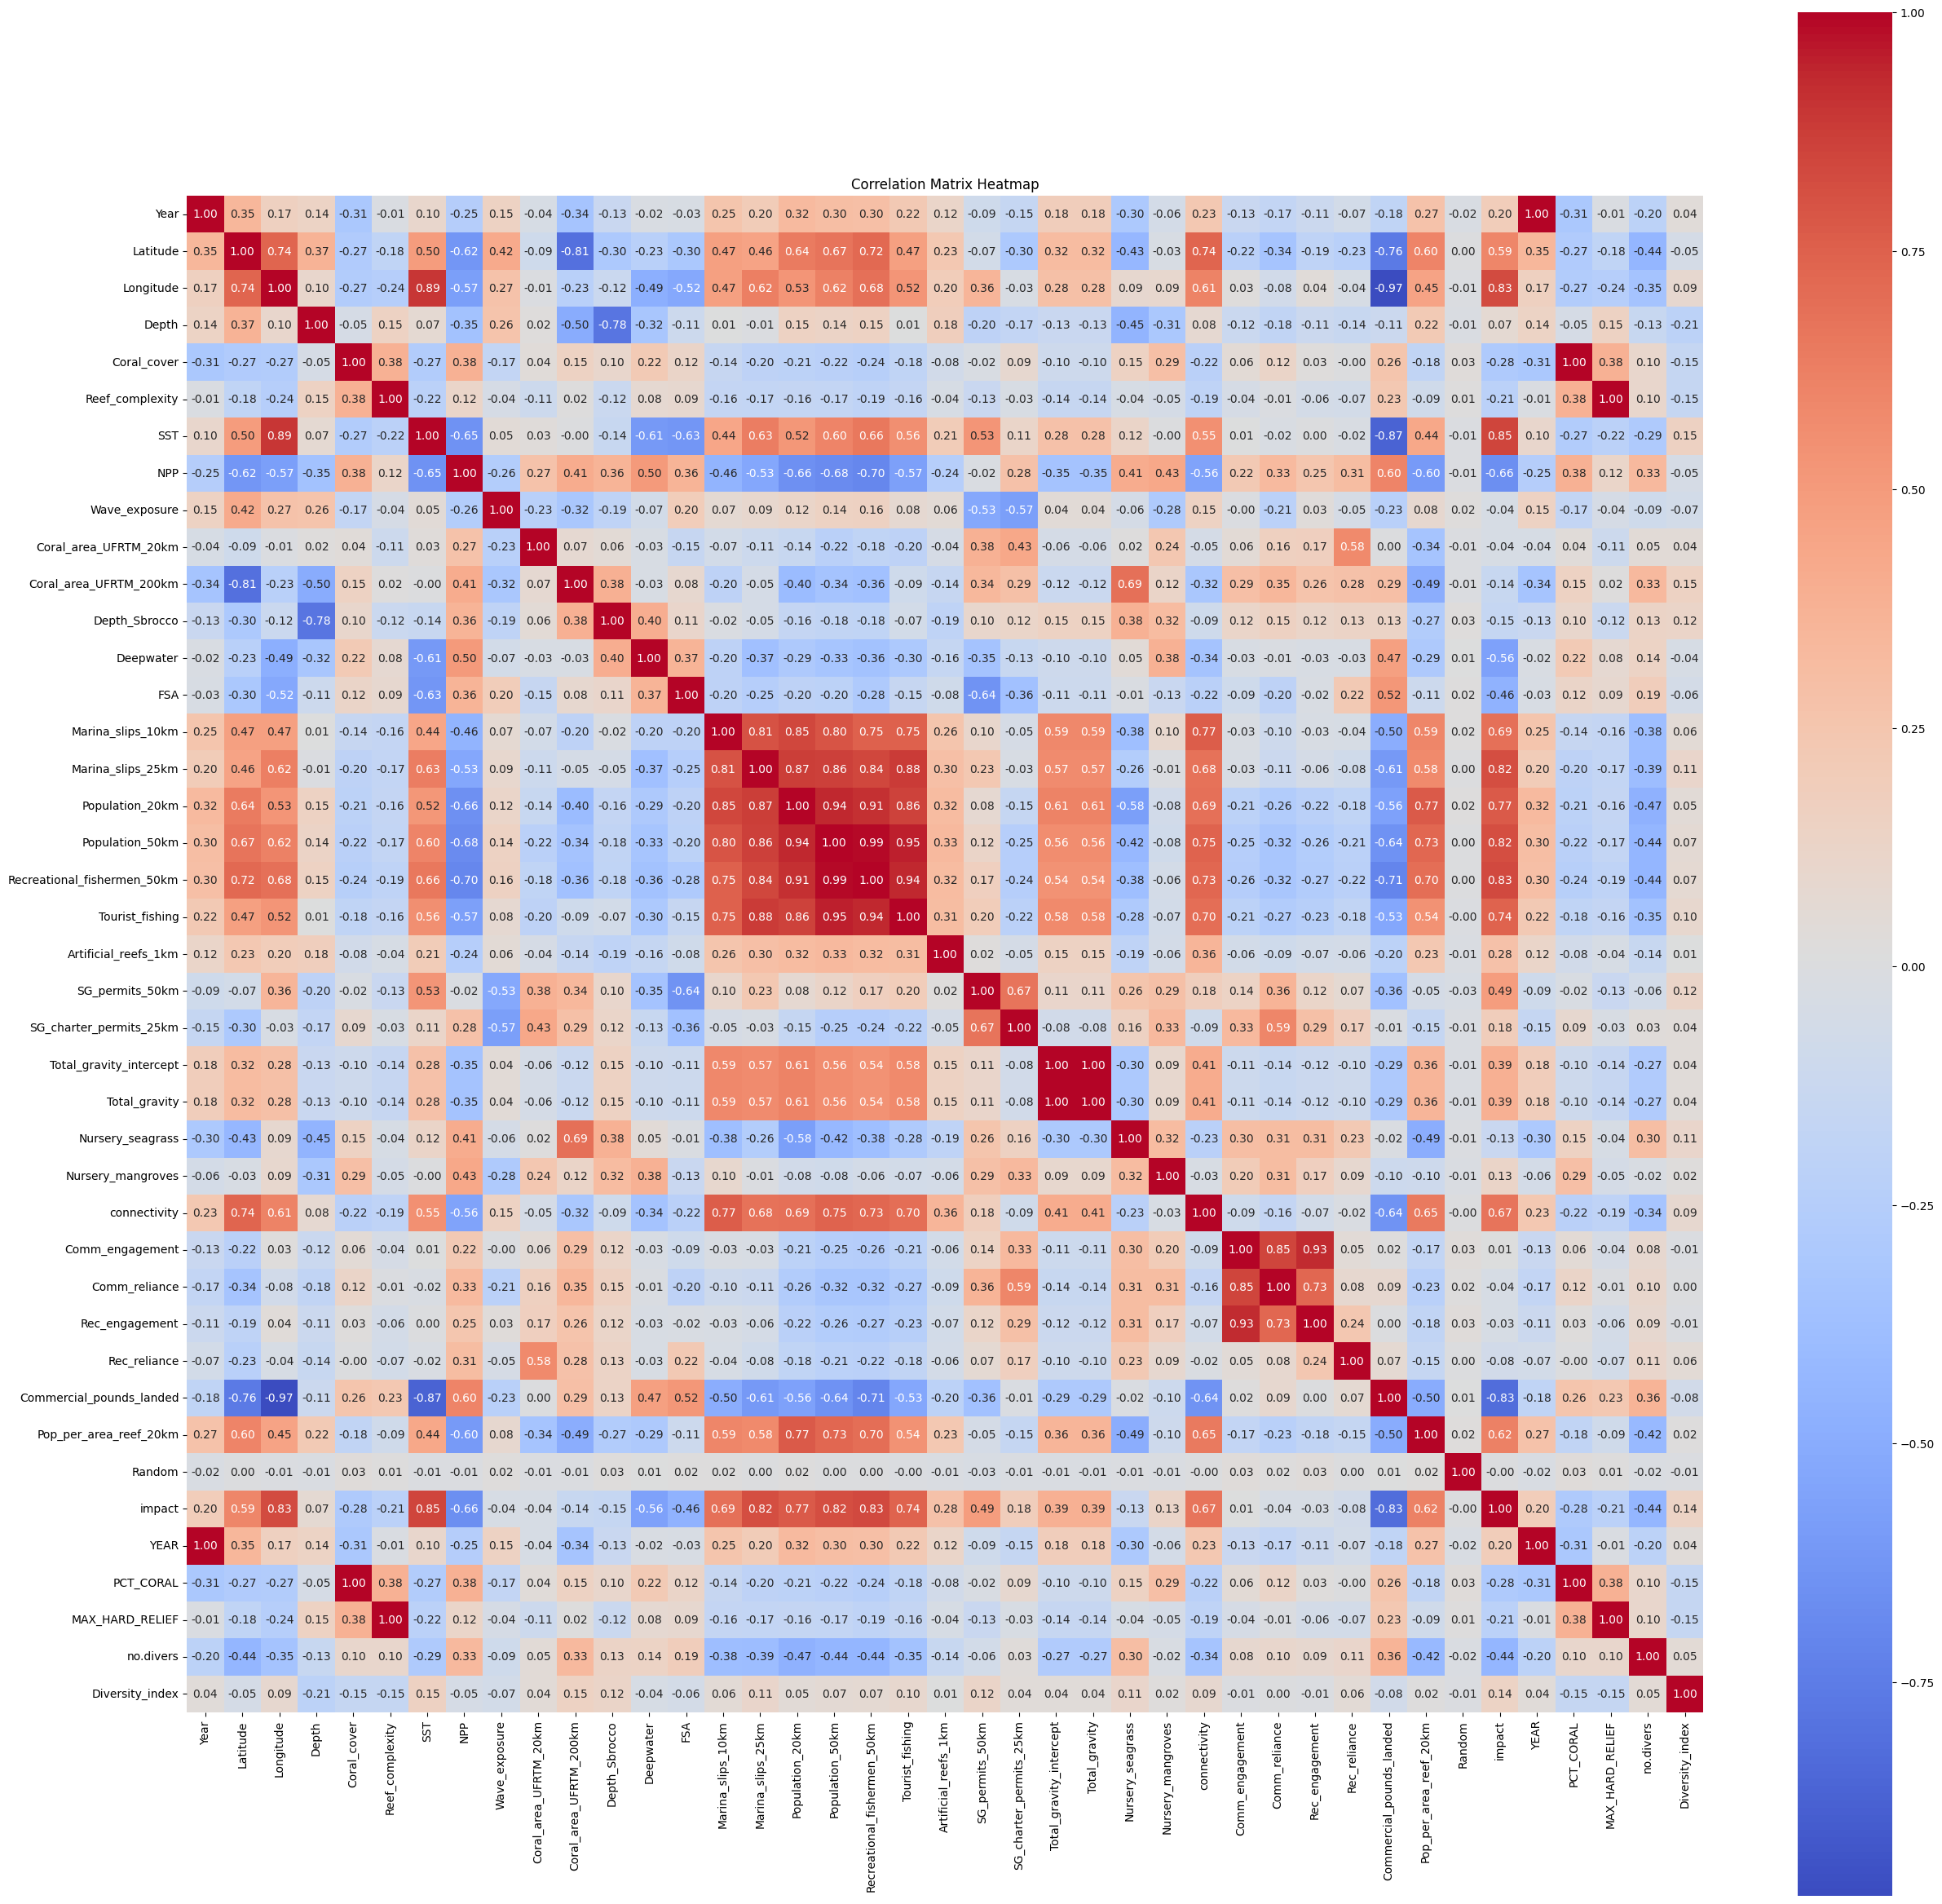

In [60]:
#crating correlation matrix heat map
corr_matrix = df_numerical.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
# plt.savefig('Correlation Matrix Heatmap.png')
plt.show()

#### **Factors Directly Related to Diversity Index:**

- SST (Sea Surface Temperature): 0.1519
- Coral_area_UFRTM_200km: 0.1502
- Impact: 0.1426
- Depth_Sbrocco: 0.1217
- SG_permits_50km: 0.1215
- Nursery_seagrass: 0.1106
- Marina_slips_25km: 0.1065
- Tourist_fishing: 0.0959
- Connectivity: 0.0892

#### **Factors Inversely Related to Diversity Index:**

- Depth: -0.2077
- Reef_complexity: -0.1521
- MAX_HARD_RELIEF: -0.1521
- Coral_cover: -0.1493
- PCT_CORAL: -0.1493
- Commercial_pounds_landed: -0.0771
- Wave_exposure: -0.0679
- FSA: -0.0593
- Latitude: -0.0491
- NPP: -0.0481
- Deepwater: -0.0379

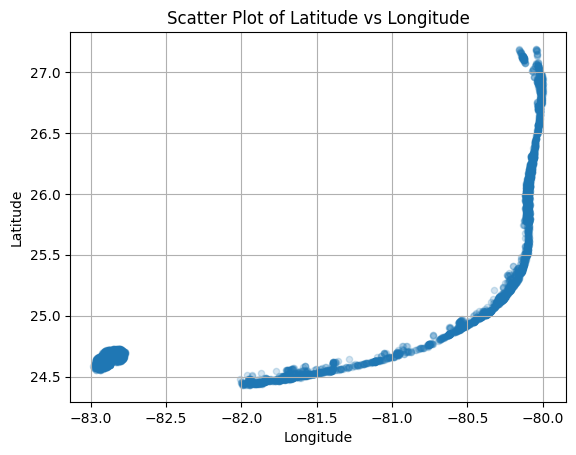

In [61]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Plotting the scatter plot
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

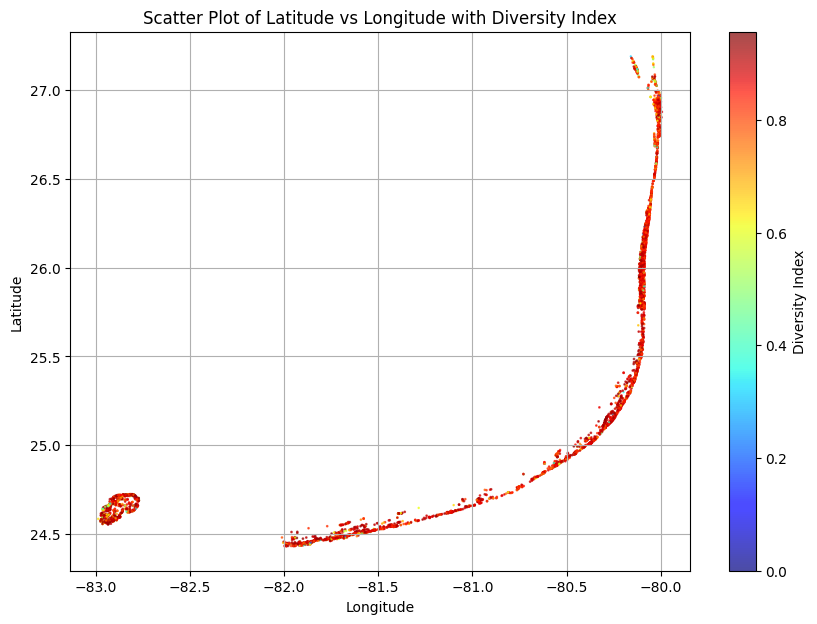

In [62]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Plotting the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=df["Longitude"], 
    y=df["Latitude"], 
    s=df["Diversity_index"] * 1,  # Scale up the size for better visualization
    c=df["Diversity_index"], 
    cmap="jet", 
    alpha=0.7
)
plt.colorbar(scatter, label='Diversity Index')
plt.title('Scatter Plot of Latitude vs Longitude with Diversity Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

#### **Observations:**

##### **Data Points Distribution:**
1. The scatter plot shows clusters of data points that represent different geographic locations.
2. One dense cluster is present around longitude -82.5 and latitude 24.5.
3. Another dense cluster follows a curved pattern from longitude -82.0 to -80.0 and latitude 25.0 to 27.0.

##### **Color Representation:**
1. The color of the points represents the diversity index.
2. Most points are in the red to yellow range, indicating higher diversity index values (0.4 to 0.8).

##### **Correlation Analysis:**

*Latitude vs Longitude:*

- The latitude and longitude values show a clear pattern, with a dense cluster of points in specific regions. The main cluster appears to follow a curved trajectory, indicating a geographical feature or boundary influencing the distribution.

*Latitude and Longitude vs Diversity Index:*
- The diversity index is higher (red and yellow colors) in areas with denser clusters of points, particularly along the curved path from latitude 25.0 to 27.0 and longitude -82.0 to -80.0.
  
- The area around latitude 24.5 and longitude -82.5 also shows higher diversity, but this is a smaller, denser cluster.

##### **Conclusion:**

1. There appears to be a correlation between geographic location (latitude and longitude) and the diversity index.
2. Higher diversity index values are observed in denser, specific regions, suggesting that certain geographic areas have higher diversity.
3. The plot does not show a linear correlation but indicates specific areas with varying diversity levels.

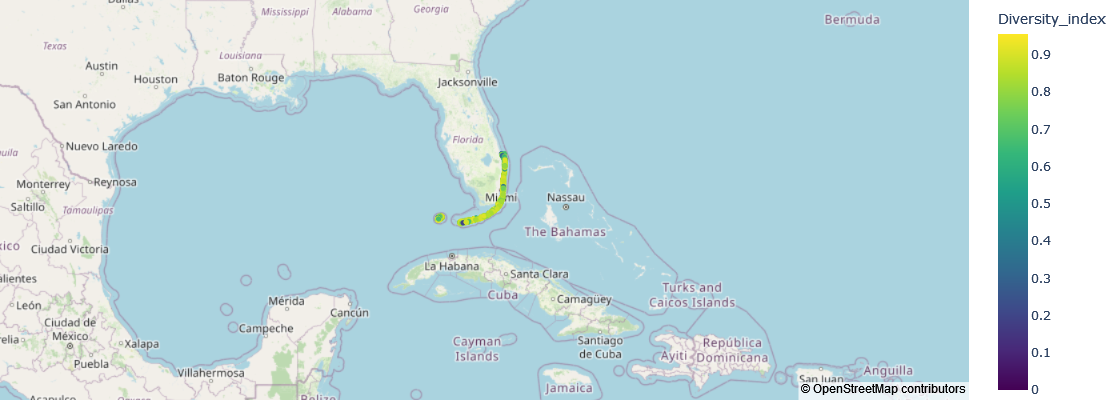

In [63]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Create the scatter mapbox plot
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", 
                        hover_name="site", hover_data=["Diversity_index"],
                        color="Diversity_index", color_continuous_scale="Viridis",
                        zoom=4, height=400)

# Update layout for mapbox style and margins
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

We can assume that areas near to wildlife protection authorities are more protected and have higher diversity index as compare to area near to local population.

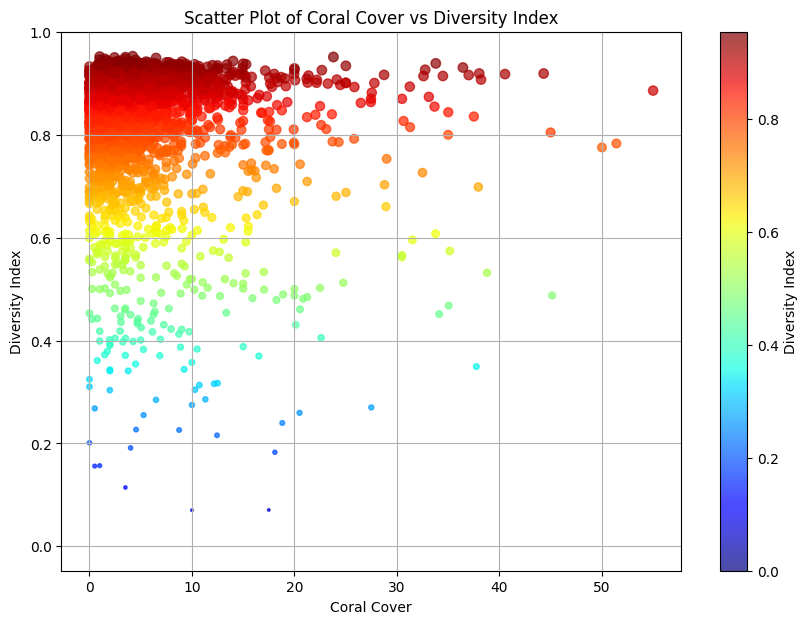

In [64]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Scatter Plot of Coral Cover vs Diversity Index
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=df["Coral_cover"], 
    y=df["Diversity_index"], 
    s=df["Diversity_index"] * 50,  # Adjust the scale factor for better visualization
    c=df["Diversity_index"], 
    cmap="jet", 
    alpha=0.7
)
plt.colorbar(scatter, label='Diversity Index')
plt.title('Scatter Plot of Coral Cover vs Diversity Index')
plt.xlabel('Coral Cover')
plt.ylabel('Diversity Index')
plt.grid(True)
plt.show()


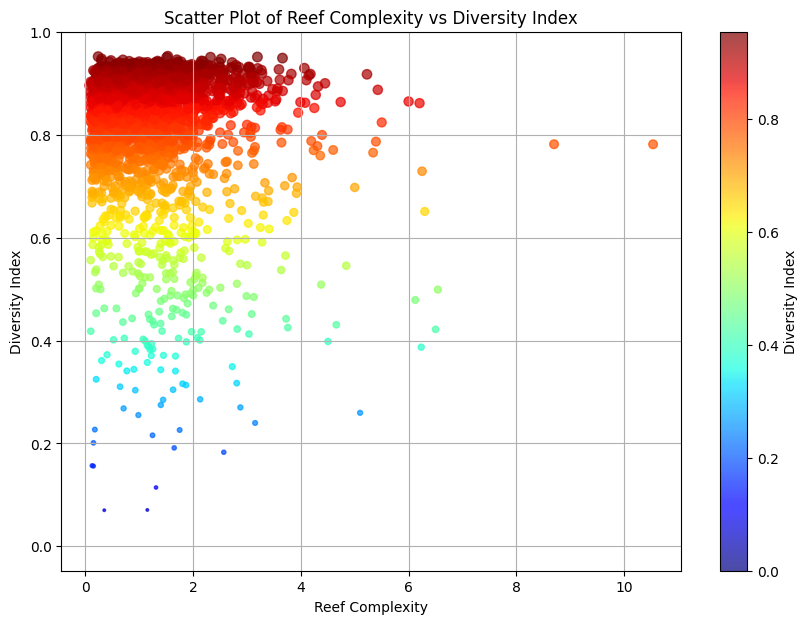

In [65]:
# Scatter Plot of Reef Complexity vs Diversity Index
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=df["Reef_complexity"], 
    y=df["Diversity_index"], 
    s=df["Diversity_index"] * 50,  # Adjust the scale factor for better visualization
    c=df["Diversity_index"], 
    cmap="jet", 
    alpha=0.7
)
plt.colorbar(scatter, label='Diversity Index')
plt.title('Scatter Plot of Reef Complexity vs Diversity Index')
plt.xlabel('Reef Complexity')
plt.ylabel('Diversity Index')
plt.grid(True)
plt.show()

 ### Data Cleaning and Preprocessing

In [66]:
# General information and data types
info = df.info()

# Checking for missing values
missing_values = df.isnull().sum()

# Statistical summary of numerical columns
summary_stats = df.describe()

info, missing_values, summary_stats

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

(None,
 site                              0
 model                             0
 Year                              0
 Month                             0
 Latitude                          0
 Longitude                         0
 Depth                             0
 Region                            0
 Coral_cover                     707
 Reef_complexity                 707
 SST                               0
 NPP                               0
 Wave_exposure                     0
 Habitat_type_classLV0             0
 Habitat_type_classLV2             0
 Coral_area_UFRTM_20km             0
 Coral_area_UFRTM_200km            0
 Depth_Sbrocco                     0
 Deepwater                         0
 FSA                               0
 Marina_slips_10km                 0
 Marina_slips_25km                 0
 Marine_reserve                    0
 Population_20km                   0
 Population_50km                   0
 Recreational_fishermen_50km       0
 Tourist_fishing               

<Figure size 1000x600 with 0 Axes>

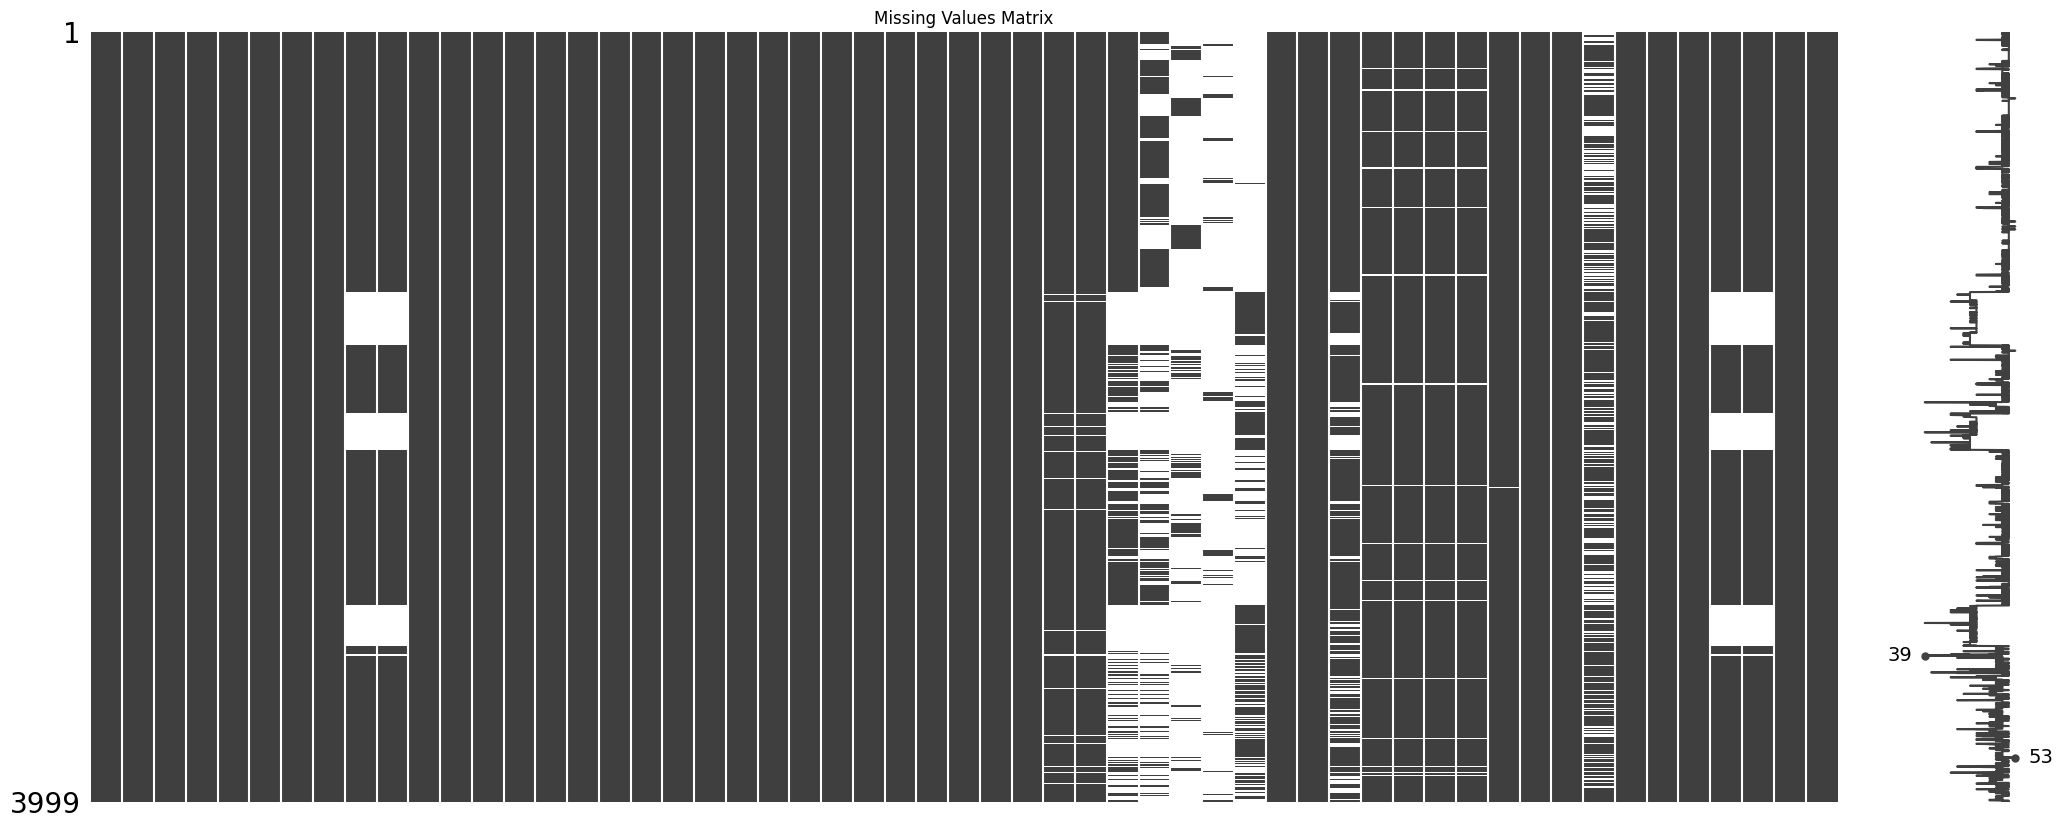

In [67]:
# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

#### **Columns to Keep (Strong Relation with Diversity Index):**

- SST
- Coral_area_UFRTM_200km
- Impact
- Depth_Sbrocco
- SG_permits_50km
- Nursery_seagrass
- Marina_slips_25km
- Tourist_fishing
- Connectivity
- Depth
- Reef_complexity
- MAX_HARD_RELIEF
- Coral_cover
- PCT_CORAL
- Population_20km
- Population_50km

#### **Columns to Remove (Weak or No Relation with Diversity Index):**

- Unnamed: 0
- Year
- Random
- Rec_engagement
- Comm_engagement
- Artificial_reefs_1km
- Pop_per_area_reef_20km
- SG_charter_permits_25km
- Total_gravity
- Total_gravity_intercept
- Recreational_fishermen_50km
- Marina_slips_10km
- Rec_reliance  
- Comm_reliance

In [68]:
# List of columns to remove
columns_to_remove = [
    'Year', 'Random', 'Rec_engagement', 'Comm_engagement', 
    'Artificial_reefs_1km', 'Pop_per_area_reef_20km', 'SG_charter_permits_25km', 
    'Total_gravity', 'Total_gravity_intercept',
    'Recreational_fishermen_50km', 'Marina_slips_10km', 
    'Rec_reliance', 'Comm_reliance'
]

# Drop the specified columns from the original data frame
df.drop(columns=columns_to_remove, inplace=True)

# Display the first few rows of the modified data frame
print(df.head())

           site    model   Month   Latitude  Longitude      Depth    Region  \
0  4733520_128U  biomass  August  24.446433 -81.962900   9.800000  FLA KEYS   
1  4966028_487U   impact    June  24.461130 -81.840099   8.821212  FLA KEYS   
2  4981032_102U  biomass    July  24.467250 -81.832367  17.399239  FLA KEYS   
3  4999782_141U   impact  August  24.468767 -81.822167   9.200000  FLA KEYS   
4  5026033_475U   impact    June  24.470206 -81.808148   8.558032  FLA KEYS   

   Coral_cover  Reef_complexity        SST  ...  connectivity  \
0     2.000000         0.550322  23.595392  ...      4.618931   
1     6.181818         1.886364  23.578271  ...      9.984375   
2     7.506345         0.749873  23.551355  ...      9.984375   
3    10.000000         0.400000  23.556451  ...      9.984375   
4     2.870486         0.289415  23.567590  ...      9.984375   

   Commercial_pounds_landed impact  YEAR  HABITAT_CD    REGION  PCT_CORAL  \
0                 1511066.2  0.205  2005     ISOL_LR  FLA

In [69]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])

Coral_cover                  707
Reef_complexity              707
Keys_Divisions              1429
FKNMS                       2341
DryTortugas                 3372
BNP                         3740
CoralECA                    2635
connectivity                 623
Commercial_pounds_landed       1
impact                      1220
PCT_CORAL                    707
MAX_HARD_RELIEF              707
dtype: int64


#### **Handling Missing Values**
##### *Columns with Missing Values:*
For these columns, we can use imputation mean methods to fill in the missing values.

In [70]:
# Identify numerical columns in the DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean for each numerical column
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# Display the number of missing values after filling to verify
missing_values_after_filling = df.isnull().sum()

missing_values_after_filling


site                           0
model                          0
Month                          0
Latitude                       0
Longitude                      0
Depth                          0
Region                         0
Coral_cover                    0
Reef_complexity                0
SST                            0
NPP                            0
Wave_exposure                  0
Habitat_type_classLV0          0
Habitat_type_classLV2          0
Coral_area_UFRTM_20km          0
Coral_area_UFRTM_200km         0
Depth_Sbrocco                  0
Deepwater                      0
FSA                            0
Marina_slips_25km              0
Marine_reserve                 0
Population_20km                0
Population_50km                0
Tourist_fishing                0
SG_permits_50km                0
Keys_Divisions              1429
FKNMS                       2341
DryTortugas                 3372
BNP                         3740
CoralECA                    2635
Nursery_se

In [71]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])

Keys_Divisions    1429
FKNMS             2341
DryTortugas       3372
BNP               3740
CoralECA          2635
dtype: int64


In [72]:
 ###Model prediction

In [74]:
# Check for non-numeric values in numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    # Convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Identify columns that should be numeric but have non-numeric data
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Object columns that may contain non-numeric data:")
for col in non_numeric_columns:
    if df[col].str.contains(r'\D', na=False).any():  # Check if there are non-numeric values
        print(f"Column: {col}")
        print(df[col].unique()[:10])  # Display a few unique values
        print(f"Number of unique values: {len(df[col].unique())}\n")


Object columns that may contain non-numeric data:
Column: site
['4733520_128U' '4966028_487U' '4981032_102U' '4999782_141U'
 '5026033_475U' '5067281_105U' '5157285_104U' '5168534_472U'
 '5187287_495U' '5194788_112U']
Number of unique values: 3999

Column: model
['biomass' 'impact']
Number of unique values: 2

Column: HABITAT_CD
['ISOL_LR' 'SPGR_HR' 'CONT_LR' 'SPGR_LR' 'ISOL_MR' 'RUBB_LR' 'ISOL_HR'
 'CONT_MR' 'CONT_HR' 'SPGR']
Number of unique values: 20

Column: REGION
['FLA KEYS' 'DRY TORT' 'SEFCRI']
Number of unique values: 3



In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop columns with non-numeric or irrelevant data
df_cleaned = df.drop(columns=['site', 'model'])

# Apply one-hot encoding to categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['HABITAT_CD', 'REGION'])

# Remove leading/trailing spaces in column names (if needed)
df_cleaned.columns = df_cleaned.columns.str.strip()

# Define the target variable ('Diversity_index' as the target)
target_column = 'Diversity_index'
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Verify the model training
print("Model training completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Make predictions (example)
y_pred = linear_model.predict(X_test)

# Verify predictions
print(f"Sample predictions: {y_pred[:5]}")


Model training completed.
Training set shape: (3199, 74)
Testing set shape: (800, 74)
Sample predictions: [0.78686095 0.83740107 0.85409292 0.78330715 0.74477946]


In [76]:
from sklearn.metrics import r2_score

# Predict the target variable for the test set
y_pred = linear_model.predict(X_test)

# Compute the R² score
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

R² score: 0.1551


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Compute R² score for Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² score: {r2_rf:.4f}")

# Compute and print Mean Squared Error for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")


Random Forest R² score: 0.1695
Random Forest Mean Squared Error: 0.0110


In [79]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting Regressor:")
print("Mean Squared Error:", mse_gbr)
print("R^2 Score:", r2_gbr)
print()

# Support Vector Regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluate Support Vector Regressor
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor:")
print("Mean Squared Error:", mse_svr)
print("R^2 Score:", r2_svr)


Gradient Boosting Regressor:
Mean Squared Error: 0.01100274061912144
R^2 Score: 0.17022128252584712

Support Vector Regressor:
Mean Squared Error: 0.013308213038591343
R^2 Score: -0.0036473937996810424
